# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Ahmad Fauzan Gendewa - 1301213162
2. Gibran Ariq Natakusuma - 1301213180 (Ketua)
3. Muhammad Adhi Gozalt - 1301213212

### Latar Belakang


Penyakit jantung adalah penyebab utama kematian di seluruh dunia, menyumbang sepertiga kematian pada tahun 2019. Kasus penyakit jantung meningkat hampir dua kali lipat selama periode tersebut, dari 271 juta pada tahun 1990 menjadi 523 juta pada tahun 2019, dan jumlah kematian akibat penyakit jantung meningkat dari 12,1 juta menjadi 18,6 juta. Diagnosis medis penyakit jantung yang efisien dan akurat serta dini memainkan peran penting dalam mengambil tindakan pencegahan untuk mencegah kematian.


Dalam penelitian ini kami menggunakan dataset Heart Disease yang diambil dari UCI Repository. Kami memilih dataset Heart Disease karena dataset ini cocok digunakan untuk klasifikasi dan memiliki data yang menarik. Pada penelitian ini metode yang dipake adalah metode ensemble Random Forest. Tujuan dari penelitian ini adalah untuk mengetahui apakah metode Random Forest mampu memprediksi penyakit jantung danmodel mana yang memiliki kinerja terbaik dalam memprediksi terkena penyakit jantung atau tidak. Metode Random Forest dipilih dikarenakan pada penelitian penyakut jantung lain dapat menghasilkan performansi yang cukup baik dilihat dari tingkat akurasi yang tinggi dibandingkan model-model lain yang diujikan. Oleh karena itu, peneliti menggunakan metode Random Forest sebagai alat uji terhadap penyakit jantung

Dataset: https://archive.ics.uci.edu/dataset/45/heart+disease






###EDA

In [ ]:
#Import Library Dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!gdown --id 1vdzssX9JP8Jrwf1NVU0UvbnLZTNojrpl

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vdzssX9JP8Jrwf1NVU0UvbnLZTNojrpl
To: /content/heart.csv
100% 11.1k/11.1k [00:00<00:00, 27.5MB/s]


In [ ]:
#Membaca Dataset
dataset = 'heart.csv'
data = pd.read_csv(dataset)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Dataset Terdiri dari 14 atribut yaitu:
1. Age: umur
2. sex: jenis kelamin (1 = laki-laki; 0 = perempuan)
3. cp: tipe nyeri dada
    -- Value 0: angina tipikal
    -- Value 1: angina atipikal
    -- Value 2: nyeri non-angina
    -- Value 3: tanpa gejala
4. trestbps: tekanan darah istirahat (dalam mm Hg saat masuk rumah sakit)
5. chol: kolestoral serum dalam mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: mengalami kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV)
    -- Value 2: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri berdasarkan kriteria Estes
8. thalach: maximum heart rate achieved
9. exang: angina akibat olahraga (1 = ya; 0 = tidak)
10. oldpeak = Depresi ST yang disebabkan oleh olahraga dibandingkan istirahat
11. slope: kemiringan puncak latihan segmen ST
    -- Value 0: menanjak
    -- Value 1: datar
    -- Value 2: menurun
12. ca: jumlah pembuluh darah besar (0-3) yang diwarnai dengan flourosopy
13. thal (thalasemia): 0 = biasa; 1 = cacat tetap; 2 = cacat yang dapat dibalik
14. condition: 0 = tidak ada penyakit, 1 = sakit

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
# Memerika Data Null
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Tidk ada data null dalam dataset Heart Disease


In [ ]:
#Memeriksa Data Duplikat
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, condition]
Index: []


Tidk ada data duplikat dalam dataset Heart Disease

In [ ]:
#Memeriksa berapa presentase orang yang terkena penyakit jantung
countNoDisease = len(data[data.condition == 0])
countHaveDisease = len(data[data.condition == 1])
print("Percentage of Patients do not have Heart Disease: {:.2f}%".format((countNoDisease / (len(data.condition)) * 100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.condition)) * 100)))

Percentage of Patients do not have Heart Disease: 53.87%
Percentage of Patients have Heart Disease: 46.13%


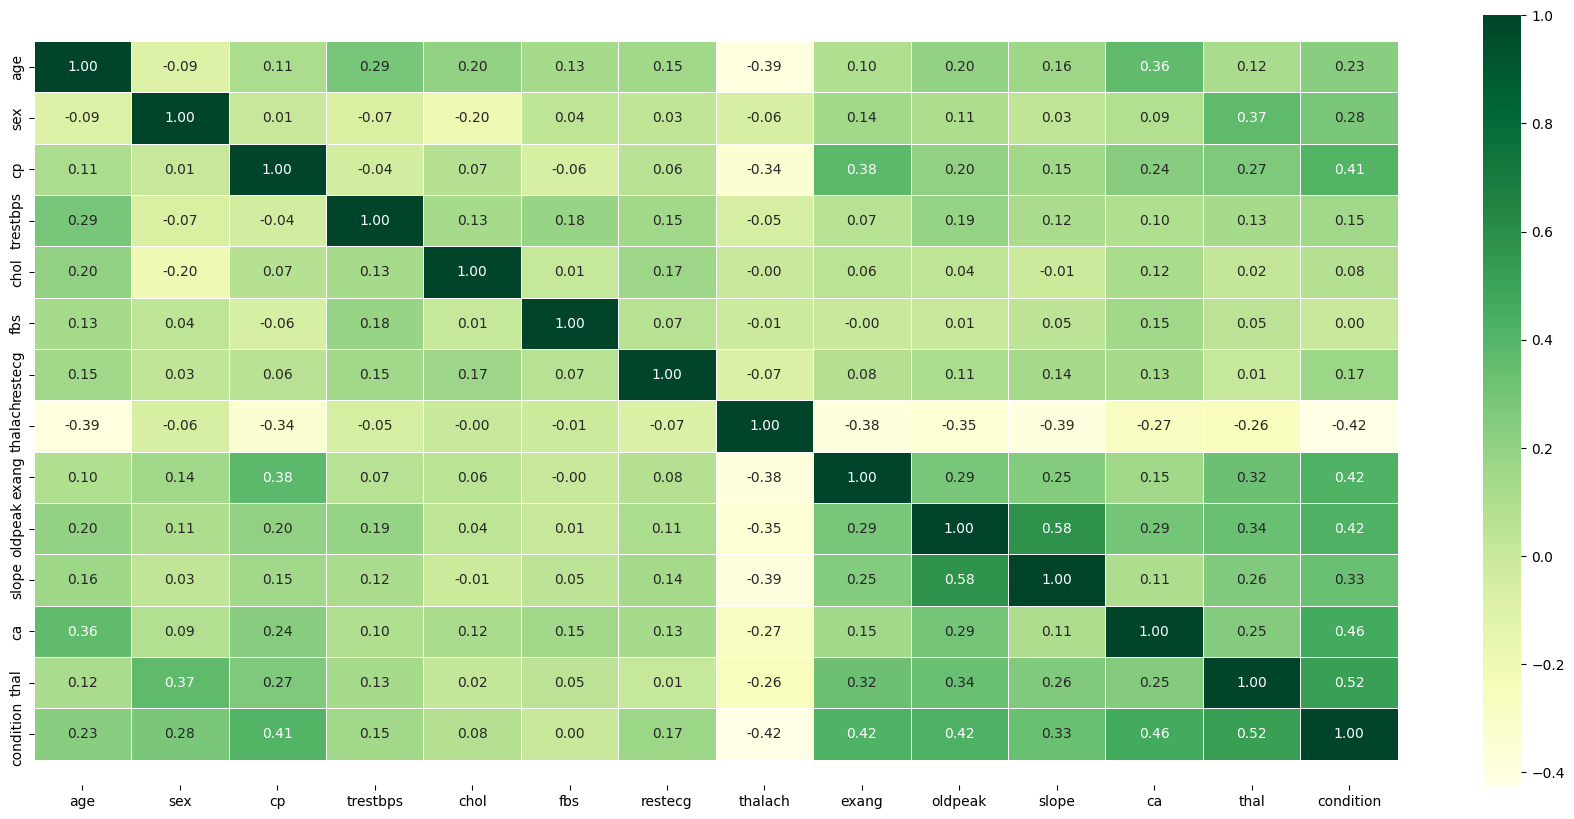

In [ ]:
#Heatmap digunakan untuk memeriksa korelasi fitur lain dengan condition(sakit atau tidak)
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

Berdasarkan Heatmap di atas kita dapat mengetahui bahwa atribut cp, exang, oldpeak, ca, dan thal merupakan fitur-fitur yang memiliki kolerasi yang cukup tinggi dengan condition. Nantinya atribut ini akan dipakai sebagai percobaan untuk model.



---



Kita menghapus atau menghilangkan atribut yang memiliki korelasi rendah dengan condition agar saat pengujian nanti bisa mendapatkan hasil yang maksimal

In [ ]:
#Drop atribut yang memiliki korelasi rendah
data = data.drop(columns=["age", "sex", "trestbps","chol","fbs", "restecg", "thalach", "slope"])
data.head()

,cp,exang,oldpeak,ca,thal,condition
0,0,0,0.1,1,0,0
1,0,0,1.8,2,0,0
2,0,0,2.6,0,0,0
3,0,0,1.4,1,0,1
4,0,1,1.8,0,0,0




---



**Melihat Outlier pada Data**

Outlier adalah data point yang berada jauh dari titik-titik lainnya pada boxplot. Outlier dapat terlihat sebagai titik yang berada di luar batas atas atau bawah boxplot.

Boxplot adalah metode visualisasi data yang digunakan untuk menunjukkan distribusi data. Boxplot terdiri dari lima elemen, yaitu:

Median: garis tengah pada boxplot yang menunjukkan nilai tengah dari data.

Q1 dan Q3: garis horizontal yang menunjukkan nilai seperempat dan tiga perempat dari data.

Batas atas dan bawah: garis horizontal yang menunjukkan nilai maksimum dan minimum dari data.

Outlier dapat diidentifikasi pada boxplot dengan melihat apakah ada data point yang berada di luar batas atas atau bawah boxplot.

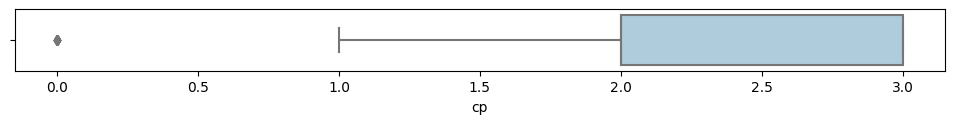

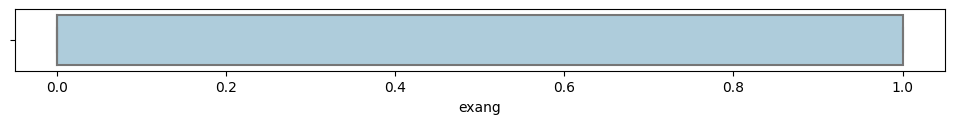

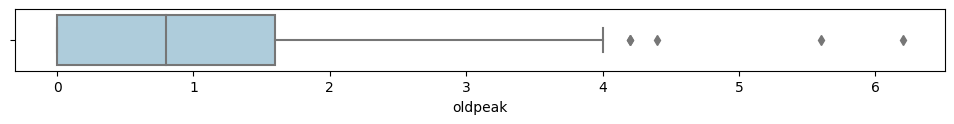

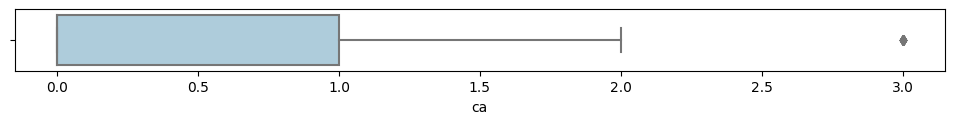

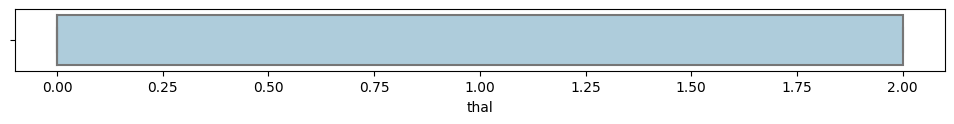

In [ ]:
#Mencek outlier pada atribut
data1=data[['cp','exang','oldpeak','ca', 'thal']]
for column in data1:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=data1, x=column,palette="Paired")

Terdapat beberapa outlier pada atribut




---



data.describe() adalah metode Pandas yang memberikan ringkasan statistik deskriptif dari suatu DataFrame. Metode ini memberikan informasi statistik seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom numerik dalam DataFrame.

In [ ]:
data.describe()

,cp,exang,oldpeak,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,2.158249,0.326599,1.043515,0.676768,0.835017,0.461279
std,0.964859,0.469761,1.124033,0.938965,0.956690,0.499340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.800000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.600000,1.000000,2.000000,1.000000
max,3.000000,1.000000,4.208000,3.000000,2.000000,1.000000


Count (Jumlah): Jumlah non-null (tidak-null) entri atau observasi dalam kolom.

Mean (Rata-rata): Nilai rata-rata dari kolom.

Std (Standar Deviasi): Deviasi standar dari nilai dalam kolom, mengukur seberapa tersebar data.

Min (Minimum): Nilai terendah dalam kolom.

25%, 50%, 75% (Kuartil): Nilai-nilai yang membagi data menjadi empat kuartil. Kuartil ke-50 (50%) adalah median.

Max (Maksimum): Nilai tertinggi dalam kolom.


###Data Pre-processing

In [ ]:
#Normalisasi Data
from sklearn.preprocessing import MinMaxScaler
newData = data.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(newData)
normalized_data = pd.DataFrame(normalized_data, columns=newData.columns)

print(normalized_data)

      cp  exang   oldpeak        ca  thal  condition
0    0.0    0.0  0.023808  0.333333   0.0        0.0
1    0.0    0.0  0.428539  0.666667   0.0        0.0
2    0.0    0.0  0.619000  0.000000   0.0        0.0
3    0.0    0.0  0.333308  0.333333   0.0        1.0
4    0.0    1.0  0.428539  0.000000   0.0        0.0
..   ...    ...       ...       ...   ...        ...
292  1.0    0.0  0.000000  0.000000   1.0        1.0
293  1.0    0.0  0.285693  0.000000   1.0        1.0
294  1.0    1.0  0.380923  0.000000   1.0        1.0
295  1.0    0.0  0.333308  0.000000   0.0        0.0
296  1.0    1.0  0.000000  0.000000   1.0        1.0

[297 rows x 6 columns]


  Normalisasi membantu untuk menjaga konsistensi skala antar fitur-fitur data. Fitur-fitur dengan rentang nilai yang besar dapat mendominasi perhitungan atau model dibandingkan dengan fitur-fitur yang memiliki rentang nilai lebih kecil. Normalisasi membantu mengurangi efek ini dengan mengubah nilai-nilai fitur ke dalam rentang tertentu, seperti 0 hingga 1 atau -1 hingga 1.
  
  Normalisasi dapat membantu mengurangi sensitivitas terhadap nilai outlier, karena nilai-nilai yang berada jauh dari rata-rata akan memiliki dampak yang lebih terukur setelah normalisasi.



---



In [ ]:
#Data baru setelah dinormalisasi
normalized_data.describe()

,cp,exang,oldpeak,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.719416,0.326599,0.248419,0.225589,0.417508,0.461279
std,0.321620,0.469761,0.267554,0.312988,0.478345,0.499340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,0.000000,0.190462,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.380923,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Terlihat terdapat perubahan dari data sebelumnya

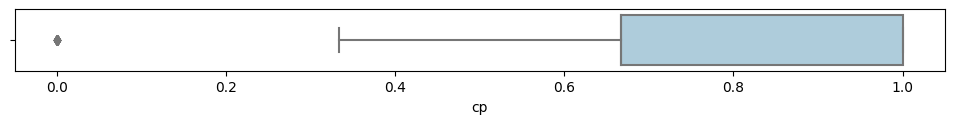

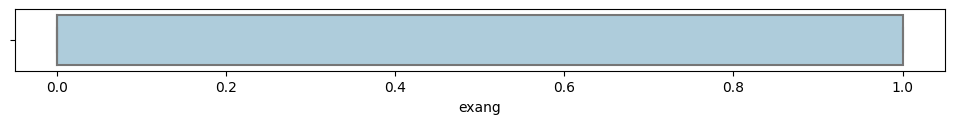

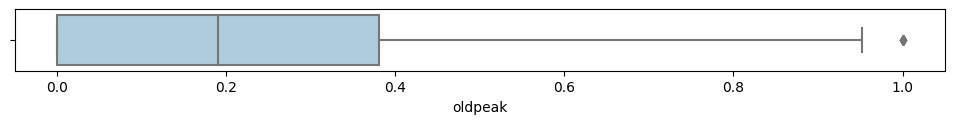

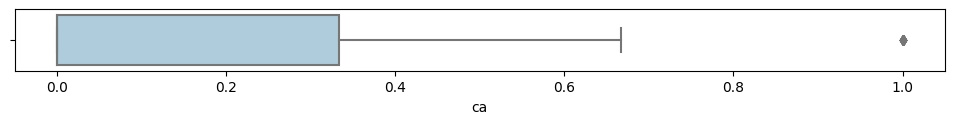

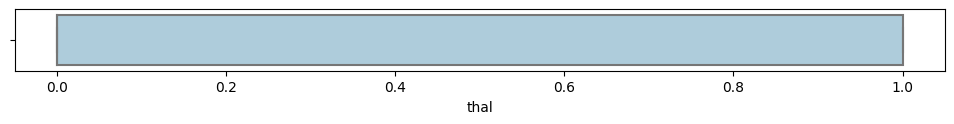

In [ ]:
#Melihat outlier setelah dinormalisasi
data1=normalized_data[['cp','exang','oldpeak','ca', 'thal']]
for column in data1:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=data1, x=column,palette="Paired")

Setelah dinormalisasi dapat dilihat bahwa outlier telah berkurang




---



In [ ]:
#Melakukan SPlit Data
from sklearn.model_selection import train_test_split
new_data = normalized_data
X = new_data[['cp','exang','oldpeak','ca', 'thal']]
y = new_data['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Dengan membagi data menjadi set pelatihan dan set pengujian, kita dapat mengukur kinerja model pada data yang tidak pernah dilihat sebelumnya. Ini memberikan gambaran yang lebih baik tentang sejauh mana model dapat melakukan generalisasi terhadap data baru.

Memisahkan data pelatihan dan pengujian membantu mengidentifikasi apakah model Anda memiliki kemampuan untuk menggeneralisasi pola dari data pelatihan ke data baru atau apakah ia mungkin terlalu "terbiasa" dengan data pelatihan tertentu (overfitting).

###Ringkasan Metode


Pada penelitian ini kami menggunakan metode ensemble **Random Forest**.

Random Forest adalah kumpulan dari decision tree. Algoritma ini merupakan kombinasi masing-masing tree dari decision tree yang kemudian digabungkan menjadi satu model. Biasanya, Random Forest dipakai untuk masalah regresi dan klasifikasi dengan kumpulan data yang berukuran besar. Klasifikasi ini dilakukan melalui penggabungan tree dalam decision tree dengan cara training dataset.

Cara kerja:
Random Forest beroperasi dalam dua tahap. Tahap pertama melibatkan penggabungan sejumlah N decision tree untuk membentuk Random Forest.
Setelah itu, tahap kedua melibatkan pembuatan prediksi untuk setiap pohon yang telah dibuat pada tahap pertama.
1. Algoritma memilih sampel acak dari dataset yang disediakan.
2. Membuat decision tree untuk setiap sampel yang dipilih. Kemudian akan didapatkan hasil prediksi dari setiap decision tree yang telah dibuat.
3. Dilakukan proses voting untuk setiap hasil prediksi. **Untuk masalah klasifikasi menggunakan modus (nilai yg paling sering muncul)** , sedangkan untuk masalah regresi akan menggunakan mean (nilai rata-rata).
4. Algoritma akan memilih hasil prediksi yang paling banyak dipilih (vote terbanyak) sebagai prediksi akhir.


---


Kami memilih Random Forest sebagai metode penelitian Random Forest dikarenakan penelitian yang berkaitan dengan memprediksi penyakit jantung sudah dilakukan beberapa peneliti menggunakan metode yang beragam seperti K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, dll. Namun, berdasarkan penelitian-penelitian yang sudah dilakukan Random Forest selalu mendapat nilai akurasi tertinggi. Studi terkait sebagai berikut:

Pada penelitian https://ejournal.upnvj.ac.id/informatik/article/view/4694/1852 penulis menggunakan Decision Tree, Naive Bayes, KNN, Random Forest, dan Decision Stump. Hasil dari penelitian tersebut Random Forest mendapat akurasi tertinggi, yaitu 80,3%

Pada penelitian  https://ejournal.upnvj.ac.id/informatik/article/view/4694/1852
penulis menggunakan Naive Bayes, Decision Tree, dan Random Forest. Hasil dari penelitian tersebut Random Forest mendapat akurasi tertinggi, yaitu 75%

Pada penelitian https://ejournal.gunadarma.ac.id/index.php/tekno/article/view/2393/1899 penulisa menggunakan Naive Bayes, KNN, Decision Tree, dan Random Forest. Hasil dari penelitian tersebut Random Forest mendapat akurasi tertinggi, yaitu 85,6%

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# Baseline Model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8120805369127517
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        83
         1.0       0.79      0.79      0.79        66

    accuracy                           0.81       149
   macro avg       0.81      0.81      0.81       149
weighted avg       0.81      0.81      0.81       149





---



Dalam pengujian model kami menggunakan pengujian dengan membedakan nilai max_depth dan n_estimatorsnya sedangkan random_statenya tetap sama.

**max_depth:**

Kegunaan: Menentukan kedalaman maksimum dari setiap pohon dalam ensemble (kumpulan pohon).

Pengaruh: Nilai max_depth mengendalikan seberapa dalam pohon akan tumbuh. Pohon yang terlalu dalam dapat mengarah pada overfitting, sementara pohon yang terlalu dangkal dapat menyebabkan underfitting. Memilih nilai yang tepat untuk max_depth melibatkan penyeimbangan antara kompleksitas model dan risiko overfitting.

**n_estimators:**

Kegunaan: Menentukan jumlah pohon dalam ensemble (kumpulan pohon).

Pengaruh: Semakin banyak pohon (n_estimators), semakin baik model cenderung berperforma. Namun, ada batasan di mana peningkatan jumlah pohon tidak selalu meningkatkan performa secara signifikan dan dapat meningkatkan waktu pelatihan. Oleh karena itu, pemilihan nilai yang baik untuk n_estimators melibatkan evaluasi trade-off antara waktu komputasi dan kinerja model.

In [ ]:
# Model 1
rfc = RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print("Accuracy score model 1:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score model 1: 0.8322147651006712
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85        83
         1.0       0.82      0.80      0.81        66

    accuracy                           0.83       149
   macro avg       0.83      0.83      0.83       149
weighted avg       0.83      0.83      0.83       149



In [ ]:
# Model 2
rfc = RandomForestClassifier(max_depth=2, n_estimators=50, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print("Accuracy score model 2:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score model 2: 0.8389261744966443
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        83
         1.0       0.84      0.79      0.81        66

    accuracy                           0.84       149
   macro avg       0.84      0.83      0.84       149
weighted avg       0.84      0.84      0.84       149



In [ ]:
# Model 3
rfc = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print("Accuracy score model 3:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score model 1: 0.8389261744966443
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        83
         1.0       0.81      0.83      0.82        66

    accuracy                           0.84       149
   macro avg       0.84      0.84      0.84       149
weighted avg       0.84      0.84      0.84       149



In [ ]:
# Model 4
rfc = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print("Accuracy score model 4:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score model 1: 0.825503355704698
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85        83
         1.0       0.81      0.79      0.80        66

    accuracy                           0.83       149
   macro avg       0.82      0.82      0.82       149
weighted avg       0.83      0.83      0.83       149



In [ ]:
import plotly.graph_objects as go

# Data hasil evaluasi model
data = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Accuracy': [0.8322, 0.8389, 0.8389, 0.8255],
    'Precision_0': [0.85, 0.84, 0.86, 0.84],
    'Precision_1': [0.82, 0.84, 0.81, 0.81],
    'Recall_0': [0.86, 0.88, 0.84, 0.86],
    'Recall_1': [0.80, 0.79, 0.83, 0.79],
    'F1_Score_0': [0.85, 0.86, 0.85, 0.85],
    'F1_Score_1': [0.81, 0.81, 0.82, 0.80]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Mengubah nilai menjadi persen
df_percent = df.copy()
df_percent.iloc[:, 1:] *= 100  # Mengalikan seluruh kolom kecuali kolom 'Model' dengan 100

# Membuat tabel plotly dengan nilai dalam bentuk persen
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_percent.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_percent['Model']] + [df_percent[col].astype(str) + '%' for col in df_percent.columns[1:]],
               fill=dict(color=['lavender', 'aliceblue']),
               align='left'))
])

# Mengatur ukuran tabel
fig.update_layout(width=1000, height=400)

# Menampilkan tabel
fig.show()


#### Hasil dan Analisis
Berdasasrkan tabel hasil akurasi model menunjukkan bahwa Model 2 dan Model 3 memiliki kinerja tertinggi, dengan akurasi masing-masing sebesar 83.89%, diikuti oleh Model 1 yang tetap memiliki akurasi yang cukup baik, yaitu 83.22%.Sementara itu, Model 4 menunjukkan akurasi yang paling rendah, dengan 82.55%.

Kami membandingkan model 2 dan 3 karena memiliki hasil yang cukup tipis.

**Akurasi Keseluruhan (Accuracy):**

Model 2 memiliki akurasi sebesar 83.89%.
Model 3 juga memiliki akurasi sebesar 83.89%.
Berdasarkan akurasi saja, keduanya memiliki performa yang setara.
Precision, Recall, dan F1-Score untuk Kelas 1:

Kami memfokuskan pada kemampuan model untuk memprediksi kelas 1, yang mewakili kasus penyakit jantung.

Model 2 memiliki precision, recall, dan f1-score untuk kelas 1 masing-masing sebesar 84%, 79%, dan 81%.

Model 3 memiliki precision, recall, dan f1-score untuk kelas 1 masing-masing sebesar 81%, 83%, dan 82%.

Model 3 memiliki recall yang sedikit lebih tinggi untuk kelas 1, menunjukkan kemampuannya untuk menangkap lebih banyak positif sebenarnya.


---



#### Kesimpulan
Dari tabel dan hasil analisis model 3 memiliki keseimbangan yang baik antara precision, recall, dan f1-score untuk kedua kelas, menjadikannya model yang paling optimal dalam hal keseimbangan performa.

Model 3 memiliki recall yang sedikit lebih tinggi untuk kelas 1, yang berarti kemampuannya untuk mendeteksi kasus penyakit jantung lebih baik dibandingkan Model 2.

Dalam konteks kesehatan, recall (sensitivitas) seringkali dianggap penting karena kesalahan false negatives dapat memiliki konsekuensi yang lebih serius (melewatkan kasus penyakit jantung). Oleh karena itu, Model 3 merupakan model yang paling baik untuk digunakan dalam memprediksi penyakit jantung dengan dengan max_depth = 4 dan n_estimators = 100. Berdasarkan hasil dari penelitian juga membuktikan bahwa metode ensemble Random Forest merupakan metode yang baik untuk digunakan dalam memprediksi penyakit jantung, ini juga membuktikan bahwa studi terkait yang diambil akurat dan relevan dengan penelitian kami.